In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [24]:
app_train.head()
# 以AMT_INCOME_TOTAL、AMT_CREDIT這兩個欄位為例，進行觀察

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
app_train[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [37]:
# 用DataFrame的相閞函式，得出特定欄位的平均數及標準差等資訊
inc_total = app_train['AMT_INCOME_TOTAL']
(min, max, avg, std) = inc_total.min(), inc_total.max(), inc_total.mean(), inc_total.std()
print('最小:{0:f}, 最大:{1:f}, 平均:{2:f}, 標準差:{3:f}'.format(min, max, avg, std))

最小:25650.000000, 最大:117000000.000000, 平均:168797.919297, 標準差:237123.146279


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b0994e0>]],
      dtype=object)

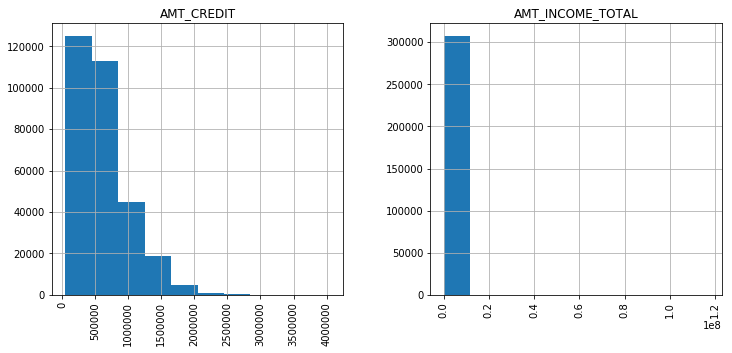

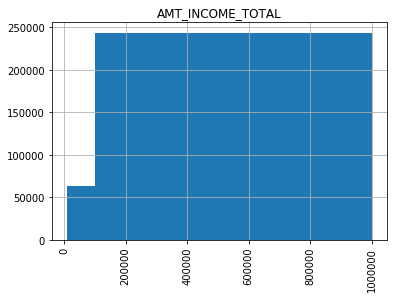

In [32]:
# 畫出直方圖
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
app_train.hist(column=['AMT_INCOME_TOTAL', 'AMT_CREDIT'], figsize=(12,5), xrot=90)

# AMT_INCOME_TOTAL這個欄位值相差太大（max是10**8, min是10**4 ）
# 用指定bins為一個Series的方式來觀察，可以發現大多分存在1.0e+6之前，顯然有少量特大的離群值
app_train.hist(column='AMT_INCOME_TOTAL', bins=[1.0e+4,1.0e+5,1.0e+6], xrot=90)